In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import BasicAer
from qiskit.ml.datasets import ad_hoc_data, breast_cancer
from qiskit.aqua import aqua_globals, QuantumInstance
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua.algorithms import SklearnSVM, QSVM
from qiskit.circuit.library import ZZFeatureMap

In [2]:
feature_dim = 2 # dimension of each data point
training_dataset_size = 20
testing_dataset_size = 10
random_seed = 10598
shots = 1024

sample_Total, training_input, test_input, class_labels = ad_hoc_data(
    training_size=training_dataset_size, 
    test_size=testing_dataset_size, 
    n=feature_dim, gap=0.3, plot_data=False
)
datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

{'A': 0, 'B': 1}


In [3]:
backend = BasicAer.get_backend('qasm_simulator')

feature_map = ZZFeatureMap(feature_dim, reps=2)

svm = QSVM(feature_map, training_input, test_input, None)# the data for prediction can be fed later.
svm.random_seed = random_seed

quantum_instance = QuantumInstance(backend, shots=shots, seed_simulator=random_seed, seed_transpiler=random_seed)

result = svm.run(quantum_instance)

kernel matrix during the training:


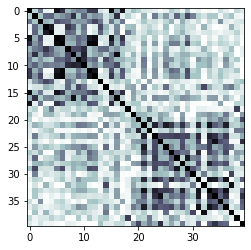

testing success ratio:  1.0
detail tentang Training dataset:  {'A': array([[4.71238898, 3.70707933],
       [6.22035345, 3.26725636],
       [3.64424748, 2.07345115],
       [2.82743339, 0.12566371],
       [2.82743339, 0.37699112],
       [0.12566371, 5.40353936],
       [4.83805269, 3.83274304],
       [0.18849556, 5.96902604],
       [1.82212374, 1.44513262],
       [5.27787566, 1.50796447],
       [3.45575192, 6.22035345],
       [0.06283185, 5.27787566],
       [0.25132741, 5.46637122],
       [5.52920307, 3.45575192],
       [5.15221195, 4.71238898],
       [0.12566371, 5.46637122],
       [1.88495559, 1.50796447],
       [6.22035345, 1.88495559],
       [0.56548668, 1.69646003],
       [0.12566371, 2.51327412]]), 'B': array([[1.50796447, 3.26725636],
       [5.59203492, 2.07345115],
       [0.12566371, 1.75929189],
       [0.50265482, 0.69115038],
       [5.40353936, 5.90619419],
       [5.40353936, 2.0106193 ],
       [2.82743339, 2.0106193 ],
       [3.14159265, 2.45044227],
 

In [4]:
print("kernel matrix during the training:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')
plt.show()

print("testing success ratio: ", result['testing_accuracy'])

print("detail tentang Training dataset: ", training_input)
print("detail tentang Testing dataset: ", test_input)
print("detail result: ", result)

In [5]:
predicted_labels = svm.predict(datapoints[0])

predicted_classes = map_label_to_class_name(predicted_labels, svm.label_to_class)
print("ground truth: {}".format(datapoints[1]))
print("preduction:   {}".format(predicted_labels))

ground truth: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
preduction:   [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


# The breast cancer dataset

In [6]:
import time
start_time = time.time()

sample_Total, training_input, test_input, class_labels = breast_cancer(
    training_size=training_dataset_size, 
    test_size=testing_dataset_size, 
    n=feature_dim, plot_data=False
)
datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

{'A': 0, 'B': 1}


In [7]:
backend = BasicAer.get_backend('qasm_simulator')

feature_map = ZZFeatureMap(feature_dim, reps=2)

svm = QSVM(feature_map, training_input, test_input, None)# the data for prediction can be fed later.
svm.random_seed = random_seed

quantum_instance = QuantumInstance(backend, shots=shots, seed_simulator=random_seed, seed_transpiler=random_seed)

result = svm.run(quantum_instance)

kernel matrix during the training:


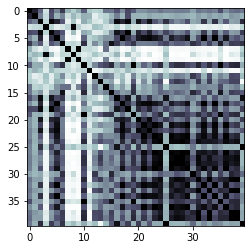

testing success ratio:  0.8
--- 9.461729764938354 seconds ---
detail tentang Training dataset:  {'A': array([[-0.19172231, -0.48047638],
       [-0.08931675, -0.69047276],
       [-0.50124222, -0.38404633],
       [-0.04524656, -0.06299861],
       [-0.36503477, -0.4966686 ],
       [-0.44318575, -0.59164354],
       [-0.4146524 , -0.22790637],
       [ 0.18070867, -0.79119457],
       [-0.05916688, -0.00087508],
       [ 0.17702071, -0.80782303],
       [-0.33656083, -0.17191985],
       [ 0.43561957, -0.10878753],
       [ 0.3697556 , -0.81262249],
       [ 0.65356721, -0.03027689],
       [-0.04118997, -0.45214114],
       [-0.49742204, -0.11441314],
       [-0.51335869, -0.30515363],
       [-0.31666169, -0.72652614],
       [-0.35047551, -0.5085641 ],
       [-0.30704169, -0.19348554]]), 'B': array([[-0.80381589, -0.17496736],
       [-0.8333448 , -0.25876499],
       [-0.70730804, -0.29054463],
       [-0.79008762, -0.3313085 ],
       [-0.67599686, -0.50282222],
       [-0.67547

In [8]:
print("kernel matrix during the training:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')
plt.show()

print("testing success ratio: ", result['testing_accuracy'])
print("--- %s seconds ---" % (time.time() - start_time))

print("detail tentang Training dataset: ", training_input)
print("detail tentang Testing dataset: ", test_input)
print("detail result: ", result)

In [9]:
predicted_labels = svm.predict(datapoints[0])

predicted_classes = map_label_to_class_name(predicted_labels, svm.label_to_class)
print("ground truth: {}".format(datapoints[1]))
print("preduction:   {}".format(predicted_labels))

ground truth: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
preduction:   [0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1]
